In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/py/y893535s11lg5rf1_ptr9www0000gn/T/ipykernel_85007/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM Measurement').fetchall()

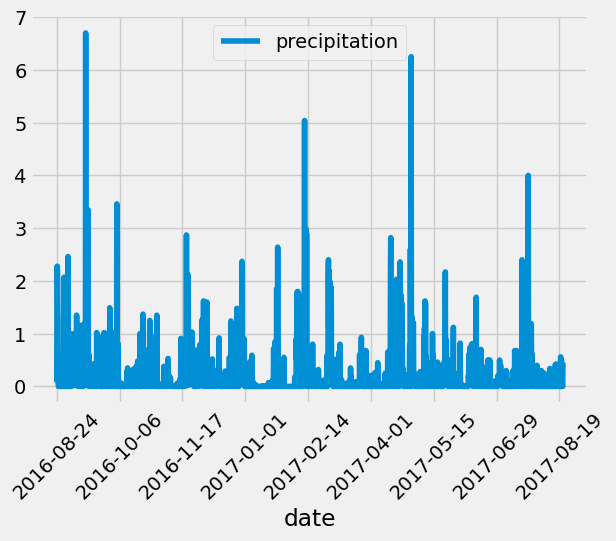

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date 1 year ago from the last data point in the database
precipt_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipt_df = pd.DataFrame(precipt_data).set_index('date')
# Rename the column
precipt_df=precipt_df.rename(columns={'prcp':'precipitation'})
# Sort the dataframe by date
precipt_df=precipt_df.sort_values(by='date').dropna()
precipt_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
precipt_df.plot(rot=45)
plt.savefig("Precipitation analysis.png")
plt.show()

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipt_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count() 
print(f'There are {station_count} stations available in this dateset.')

There are 9 stations available in this dateset.


In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

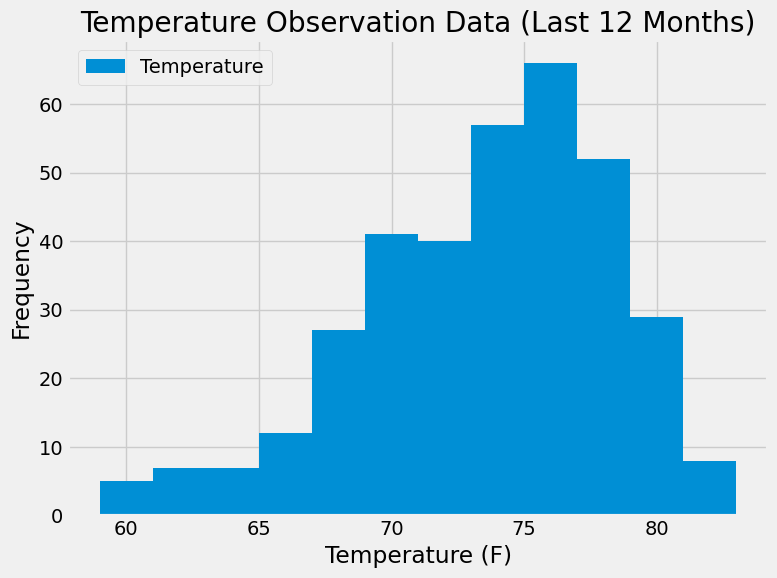

In [25]:
station_highest_obs = station_activity[0][0]

# Query the last 12 months of temperature observation data for the chosen station
results = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == station_highest_obs).all()

# Convert the query results to a DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'Temperature'])

# Plot a histogram of temperature observations
results_df.plot.hist(y='Temperature', bins=12, figsize=(8, 6))
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data (Last 12 Months)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Temp vs Freq")
plt.show()

# Close Session

In [26]:
# Close Session
session.close()